# Algoritmo Knn

#### Funciones de distancia


In [11]:
import math

# Euclidean distance
def euclidean_distance(point1, point2):
    sum_squared_diff = sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2))
    return math.sqrt(sum_squared_diff)

# Manhattan distance
def manhattan_distance(point1, point2):
    return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))

# Cosine similarity
def cosine_similarity(point1, point2):
    dot_product = sum(p1 * p2 for p1, p2 in zip(point1, point2))
    magnitude1 = math.sqrt(sum(p ** 2 for p in point1))
    magnitude2 = math.sqrt(sum(p ** 2 for p in point2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0  
    return dot_product / (magnitude1 * magnitude2)


' # Define the points or vectors\nA = [72, 95]\nB = [80, 85]\n\n# Calculate distances and similarity\neuclidean_dist = euclidean_distance(A, B)\nmanhattan_dist = manhattan_distance(A, B)\ncosine_sim = cosine_similarity(A, B)\n\nprint("Punto 1")\nprint("Euclidean Distance:", euclidean_dist)\nprint("Manhattan Distance:", manhattan_dist)\nprint("Cosine Similarity:", cosine_sim)\n\n\nA=[6,148,72,35,0,33.6,0.627,50]\nB=[8,183,64,0,0,23.3,0.672,32]\n\n# Calculate distances and similarity\neuclidean_dist = euclidean_distance(A, B)\nmanhattan_dist = manhattan_distance(A, B)\ncosine_sim = cosine_similarity(A, B)\n\nprint("\nPunto 2")\nprint("Euclidean Distance:", euclidean_dist)\nprint("Manhattan Distance:", manhattan_dist)\nprint("Cosine Similarity:", cosine_sim) '

##Datos

In [12]:
import pandas as pd
#Datos para entrenar
Datos = pd.DataFrame({'Temperatura':[83,85,80,75,72,73,72,68,70,75,74,69,65,64],
                     'Humedad':[86,85,90,80,90,78,95,80,96,70,69,70,70,65],
                     'Clase':['yes','no','no','yes','yes','no','no','yes','yes','yes','no','yes','no','yes']})
print("Entrenamiento:\n",Datos)

N_Datos = pd.DataFrame({'Temperatura':[68,73],
                     'Humedad':[75,86]})
print("\n\nPara predecir\n",N_Datos)

Entrenamiento:
     Temperatura  Humedad Clase
0            83       86   yes
1            85       85    no
2            80       90    no
3            75       80   yes
4            72       90   yes
5            73       78    no
6            72       95    no
7            68       80   yes
8            70       96   yes
9            75       70   yes
10           74       69    no
11           69       70   yes
12           65       70    no
13           64       65   yes


Para predecir
    Temperatura  Humedad
0           68       75
1           73       86


Visuaización

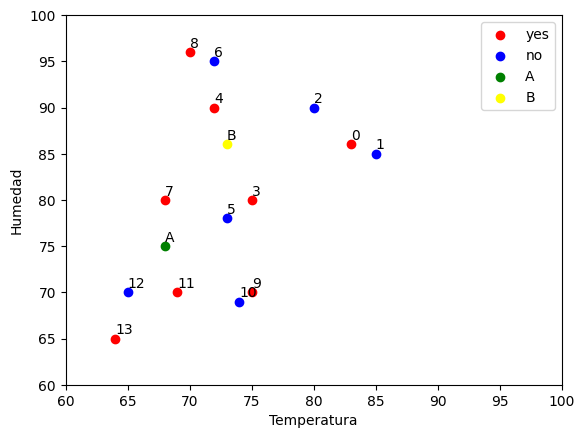

In [13]:
import matplotlib.pyplot as plt


plt.scatter(Datos['Temperatura'][Datos['Clase']=='yes'],Datos['Humedad'][Datos['Clase']=='yes'],color='red',label='yes')
plt.scatter(Datos['Temperatura'][Datos['Clase']=='no'],Datos['Humedad'][Datos['Clase']=='no'],color='blue',label='no')
plt.scatter(N_Datos.loc[0,'Temperatura'],N_Datos.loc[0,'Humedad'],color='green',label='A')
plt.scatter(N_Datos.loc[1,'Temperatura'],N_Datos.loc[1,'Humedad'],color='yellow',label='B')

for i in range(len(Datos)):
  plt.text(Datos.loc[i,'Temperatura'],Datos.loc[i,'Humedad']+0.5,i)

plt.text(N_Datos.loc[0,'Temperatura'],N_Datos.loc[0,'Humedad']+0.5,"A")
plt.text(N_Datos.loc[1,'Temperatura'],N_Datos.loc[1,'Humedad']+0.5,"B")

plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.legend()
plt.xlim(60,100)
plt.ylim(60,100)
plt.show()

Encuentra vecinos

In [14]:
# Function to find K nearest neighbors
def find_neighbors(data, new_point, k):
    distances = []
    for index, row in data.iterrows():
        point = [row['Temperatura'], row['Humedad']]
        distance = euclidean_distance(point, new_point)
        distances.append((distance, index))

    # Sort distances
    distances.sort()

    # Get the indices of the first k elements
    neighbor_indices = [index for distance, index in distances[:k]]
    
    return neighbor_indices

# Number of neighbors to find
k = 4

# Find neighbors for each new data point
for i in range(len(N_Datos)):
    new_point = [N_Datos.loc[i, 'Temperatura'], N_Datos.loc[i, 'Humedad']]
    neighbors_indices = find_neighbors(Datos, new_point, k)
    print(f"\nNeighbors for point {chr(65+i)}:")
    print(Datos.iloc[neighbors_indices])


Neighbors for point A:
    Temperatura  Humedad Clase
7            68       80   yes
11           69       70   yes
5            73       78    no
12           65       70    no

Neighbors for point B:
   Temperatura  Humedad Clase
4           72       90   yes
3           75       80   yes
7           68       80   yes
5           73       78    no


Para convertir a HTML:

-- Descargar el archivo ipynb

-- Subirlo al entorno de colab (Archivos)

-- Ejecuta rel siguieente código (cuida que el nombre del archivo coincida)

In [15]:
%%shell
jupyter nbconvert --to html 2_1_KnnManual.ipynb

UsageError: Cell magic `%%shell` not found.
